# Relatório de Análise VIII

## Identificando e Removendo Outiliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

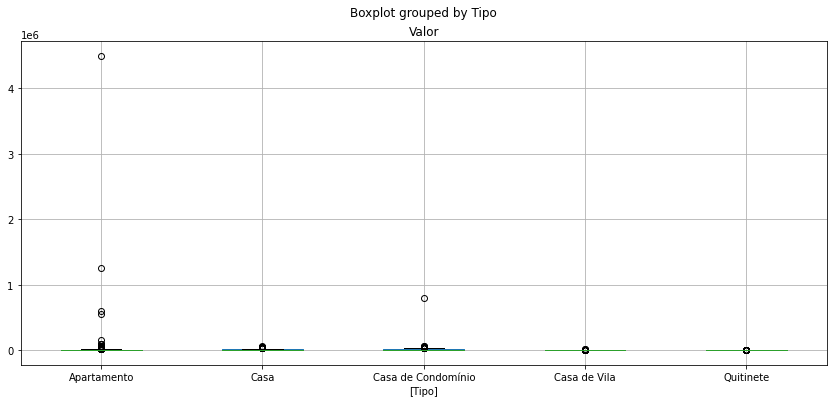

In [16]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [6]:
grupo_por_tipo = dados.groupby('Tipo')['Valor']

In [7]:
grupo_por_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

## Definindo Quartis e Limites

In [8]:
Q1 = grupo_por_tipo.quantile(0.25)
Q3 = grupo_por_tipo.quantile(0.75)

IIQ = Q3 - Q1

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [9]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [10]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [11]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [12]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [13]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [14]:
#Para acessar qualquer um desses valores:
limite_superior['Casa']

22850.0

## Eliminando Outliers Grupo a Grupo

#### A ideia por trás desse laço que será feito é a de varrer o dataFrame de tipo a tipo (1 de cada vez) e buscar nessas ocorrencias os dados que se enquadram dentro do intervalo de limite inferior e superior, para selecionar o tipo analisado por vez usaremos as keys do dicionário gerado pelo groupby

In [17]:
dados_sem_outlier = pd.DataFrame()

for tipo in grupo_por_tipo.groups.keys():
    mesmo_tipo = dados['Tipo'] == tipo # Series Booleana de validação do tipo
    dentro_da_selecao = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo]) 
    #Series Booleana que faz a validação dentro da coluna valor por valores dentro do intervalo dos limites para os grupos
    selecao = mesmo_tipo & dentro_da_selecao #Aplicação do operador and entre as duas series
    dados_validos = dados[selecao] # Selecionando Apenas as informações True do series selecao
    dados_sem_outlier = pd.concat([dados_sem_outlier, dados_validos])

In [19]:
dados_sem_outlier.index = range(dados_sem_outlier.shape[0])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

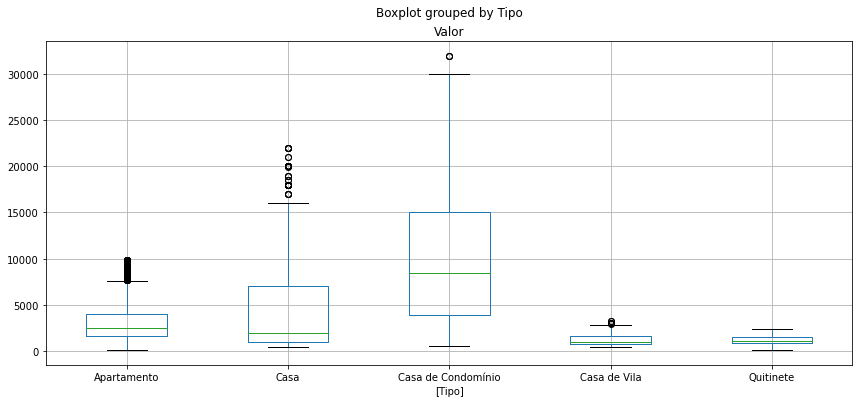

In [20]:
dados_sem_outlier.boxplot(['Valor'], by = ['Tipo'])

In [35]:
dados_sem_outlier.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep =';', index = False)

## Separando Base de Dados sem Outliers, imóveis de Alto Padrão

In [36]:
dados = pd.read_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';')

In [37]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


### Alto padrão

In [38]:
imoveis_alto_padrao = dados[dados['Valor'] >= 8000].copy()

In [39]:
imoveis_alto_padrao.sort_values(by = 'Valor', inplace = True)

In [40]:
imoveis_alto_padrao.index = range(imoveis_alto_padrao.shape[0])

In [41]:
imoveis_alto_padrao

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Ipanema,3,2,1,150,8000.0,2400.0,0.0
1,Apartamento,Jardim Botânico,3,2,3,250,8000.0,2350.0,850.0
2,Apartamento,Lagoa,4,3,1,165,8000.0,1810.0,520.0
3,Apartamento,Barra da Tijuca,3,2,1,130,8000.0,2600.0,700.0
4,Apartamento,Barra da Tijuca,4,3,2,460,8000.0,2500.0,1600.0
...,...,...,...,...,...,...,...,...,...
1507,Casa de Condomínio,Barra da Tijuca,6,3,6,1000,30000.0,1300.0,1216.0
1508,Casa de Condomínio,Barra da Tijuca,4,4,2,600,30000.0,1050.0,1300.0
1509,Casa de Condomínio,Barra da Tijuca,5,4,5,850,32000.0,1510.0,15804.0
1510,Casa de Condomínio,Barra da Tijuca,5,6,4,1000,32000.0,3000.0,1700.0


In [42]:
imoveis_alto_padrao.to_csv('dados/aluguel_residencial_alto_padrao.csv', sep = ';')